# About the Dataset

The loan dataset is open-source and available from [LendingClub.com](www.lendingclub.com), which is a two-sided platform that connects people who need money (borrowers) with people who have money (investors). 

The time frame spans from **2007 to 2010**. This project's purpose is to perform a binary classification on a loan dataset, predicting whether a borrower will be fully paid or not fully paid based on various features. It includes exploratory data analysis (EDA) plots, data preprocessing using dummy variables, train-test splitting, training Decision Tree and Random Forest models, making predictions, and evaluating the model performance.

The coding logic references Udemy course: Python for Data Science and Machine Learning Bootcamp by Jose Portilla (https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5733494#overview).

## Definition of Columns

- **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- **purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be riskier are assigned higher interest rates.
- **installment**: The monthly installments owed by the borrower if the loan is funded.
- **log.annual.inc**: The natural log of the self-reported annual income of the borrower.
- **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- **fico**: The FICO credit score of the borrower.
- **days.with.cr.line**: The number of days the borrower has had a credit line.
- **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
- **delinq.2yrs**: The number of times the borrower has been 30+ days past due on a payment in the past 2 years.
- **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

Import essential libraries for data analysis and visualization in Python, including **Pandas** for data manipulation, **NumPy** for numerical computations, **Matplotlib** for basic plotting, and **Seaborn** for statistical visualizations, with **%matplotlib** inline ensuring that plots are displayed directly in a Jupyter Notebook.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Overview of the dataset

** Use pandas to read loan_data.csv as a dataframe to further conduct the descriptive analytics.**

In [33]:
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans. Overall the dataset has 9578 non-null rows.**

In [34]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


** describe() gives us summary statistics for numerical columns in our DataFrame.**

In [35]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


** The head() method returns the first 5 rows if a number is not specified. **

In [36]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis
### Explanation of Plot 1
The code uses the `matplotlib` library in Python to create a histogram plot for the FICO scores of two different groups of loans based on their credit policy status. Here's a breakdown of what each part of the code does:

1. `plt.figure(figsize=(10,6))`: This line initializes a new figure with a specified figure size of 10 units in width and 6 units in height. This sets the dimensions of the plot canvas.

2. `loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue', bins=30, label='Credit.Policy=1')`: This line creates a histogram for the FICO scores of loans where the credit policy is equal to 1. The `alpha` parameter controls the transparency of the histogram bars (0.5 means they're somewhat transparent). The `color` parameter sets the color of the bars to blue. The `bins` parameter specifies the number of bins or intervals for the histogram. The `label` parameter is used to set a label for this data series which will be used in the legend later.

3. `loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red', bins=30, label='Credit.Policy=0')`: Similarly, this line creates a histogram for the FICO scores of loans where the credit policy is equal to 0. The settings for transparency, color, bins, and label are similar to the previous line but with different values.

4. `plt.legend()`: This line adds a legend to the plot, which will show the labels specified in the previous two lines. In this case, it will show the labels 'Credit.Policy=1' and 'Credit.Policy=0' along with their respective colors.

5. `plt.xlabel('FICO')`: This sets the label for the x-axis to 'FICO', indicating that the horizontal axis represents FICO scores.

Altogether, this code produces a histogram plot with two overlaid histograms: one for loans with a credit policy of 1 (blue) and another for loans with a credit policy of 0 (red). The x-axis represents FICO scores, and the y-axis represents the frequency of FICO scores falling within each bin. The legend helps differentiate between the two credit policy categories.

Text(0.5, 0, 'FICO')

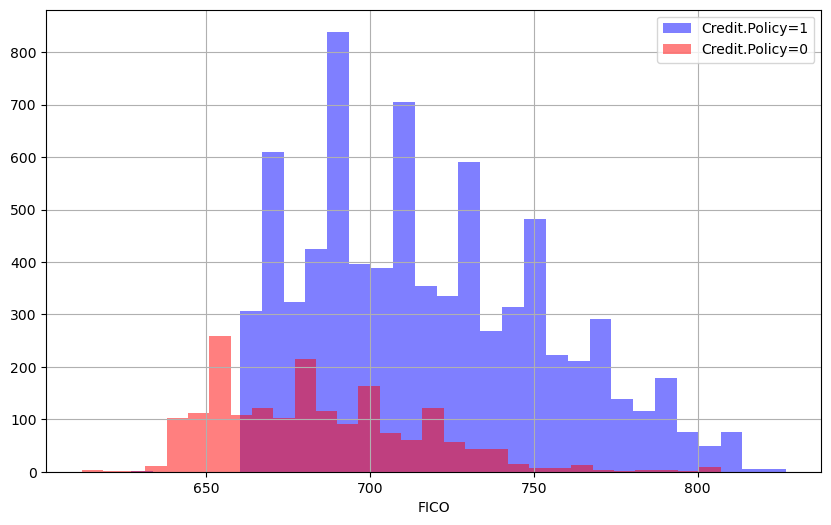

In [37]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

### Explanation of Plot 2
This chunk of codes apply the same logic as the previous one, but it produces a histogram plot with two overlaid histograms: one for loans that were not fully paid (blue) and another for loans that were fully paid (red). The x-axis represents FICO scores, and the y-axis represents the frequency of FICO scores falling within each bin. The legend helps differentiate between the two categories of loan payment status.

Text(0.5, 0, 'FICO')

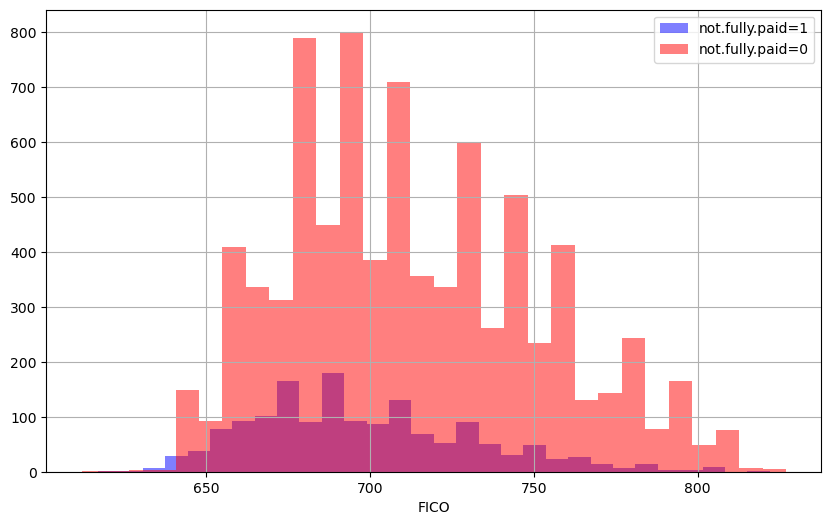

In [38]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

### Explanation of Plot 3
This is a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. Here's an interpretation of the code:

 `sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='Set1')`: This line creates a countplot using Seaborn's `countplot` function. It uses the 'purpose' column of the 'loans' DataFrame as the categorical variable to be plotted on the x-axis. The 'not.fully.paid' column is used for coloring the bars by setting it as the `hue` parameter. The `data` parameter specifies the DataFrame containing the data to be plotted. The `palette` parameter 'Set1' specifies the color palette to be used for the bars.

<Axes: xlabel='purpose', ylabel='count'>

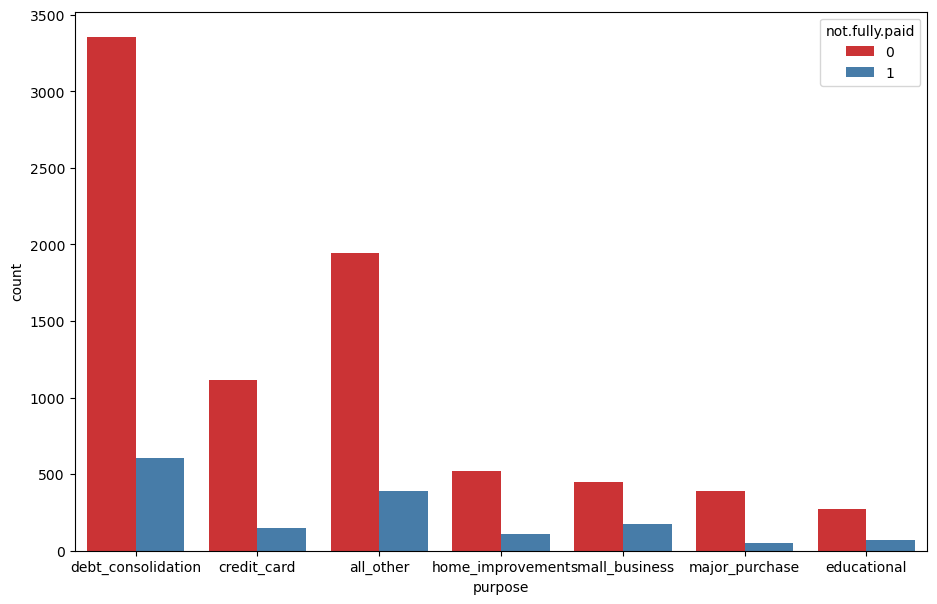

In [39]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

### Explanation of Plot 4
This plot shows the trend between FICO score and interest rate as shown in the jointplot, which also shows a downward relationship.

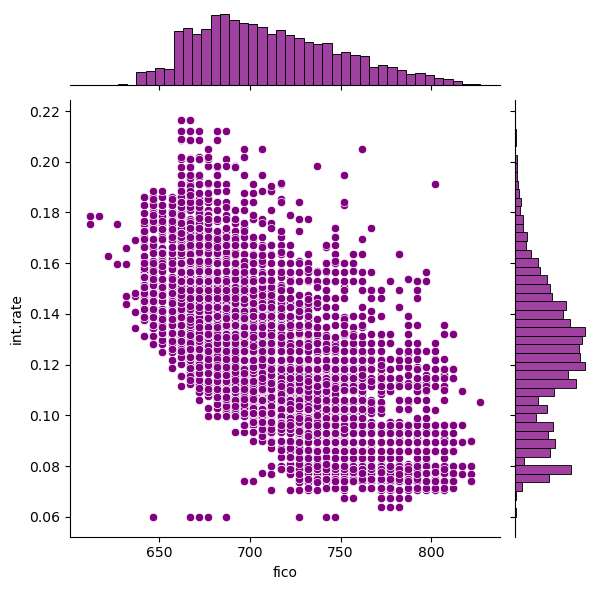

In [50]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

### Explanation of Plot 5
The following lmplots are created to see if the trend differed between not.fully.paid and credit.policy. From the plots, we can see there's a downward linear relationship between the two variables.

<Figure size 1100x700 with 0 Axes>

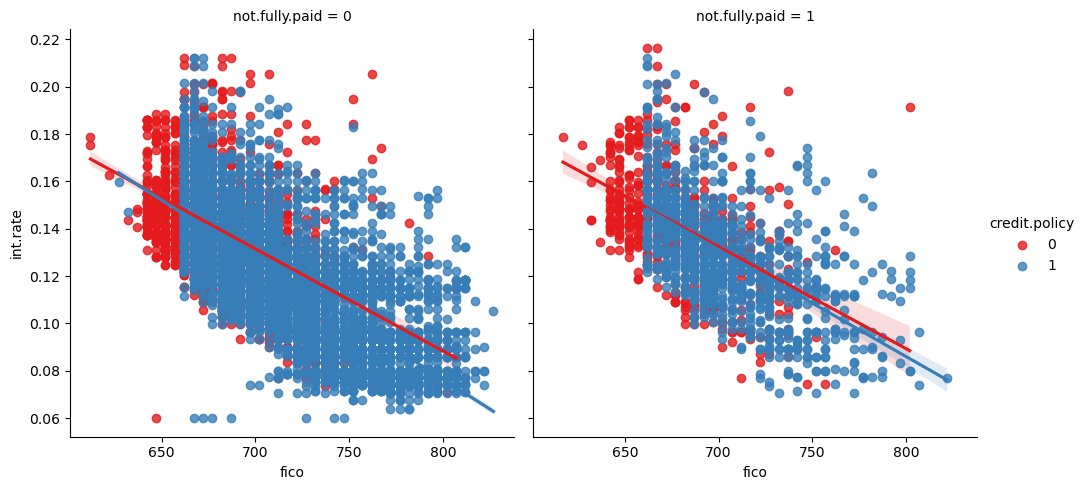

In [41]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Setting up the Data for Modeling

This step is to set up data for our Random Forest Classification Model.

## Categorical Features

Given that the **purpose** column as categorical, we need to transform them using dummy variables, so sklearn will be able to understand them. We can achieve this using pd.get_dummies.
- Here, a list called cat_feats is created, containing a single string 'purpose'. This list specifies the names of the columns in the dataset that are categorical and need to be transformed.

In [42]:
cat_feats = ['purpose']

The `pd.get_dummies function` is used to convert categorical variables into dummy variables. Here's what each parameter does:

`loans`: This is the DataFrame containing the original data.
`columns=cat_feats`: This parameter specifies which columns should be transformed into dummy variables. In this case, it's the 'purpose' column.
`drop_first=True`: This parameter is used to drop the first dummy column for each categorical feature. This is done to avoid multicollinearity, where one column can be predicted from the others. Dropping the first column is important to maintain linear independence among the dummy variables.

The result of this operation is a new DataFrame named final_data. It's a modified version of the original loans DataFrame, but now it includes additional columns representing the dummy variables for the 'purpose' categorical column.

In [43]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

## Train Test Split

This step uses the train_test_split function to split the data into training and testing sets. The parameters used here are:

- X: The features (input data) for the model.
- y: The target variable (output labels) for the model.
- test_size: This specifies the proportion of the data that should be allocated for the testing set. In this case, it's set to 0.30, meaning 30% of the data will be used for testing, and the remaining 70% will be used for training.
- random_state: This parameter sets the random seed for reproducibility. It ensures that the data split remains consistent across different runs of the code.

The function returns four sets of data:

- X_train: The features for training the model.
- X_test: The features for testing the model.
- y_train: The corresponding target labels for training.
- y_test: The corresponding target labels for testing.

The purpose of this code is to properly divide the dataset into separate subsets for training and evaluating a machine learning model. The training set is used to train the model, and the testing set is used to evaluate its performance on unseen data. 

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

- This step applies the Decision Tree Model to the split dataset. We can import DecisionTreeClassifier to do the modeling.

In [46]:
from sklearn.tree import DecisionTreeClassifier

The code snippet `dtree.fit(X_train, y_train)` is used to train (fit) a DecisionTreeClassifier model on the provided training data. Here's the breakdown:

- **`dtree`**: It's the classifier that we're using to build the decision tree model.

- **`.fit(X_train, y_train)`**: The `fit` method is a fundamental method in scikit-learn's machine learning models. It's used to train a model on a given dataset. In this case, `X_train` is the feature matrix containing the training data, and `y_train` is the corresponding target labels for the training data.

When calling `dtree.fit(X_train, y_train)`, the DecisionTreeClassifier will use the training data to learn patterns and relationships between features and the target labels. It will recursively split the data into subsets based on the feature values, guided by the splitting criterion (e.g., Gini impurity), until it creates a tree structure that can be used for making predictions.

Once the `fit` method completes, the `dtree` instance will hold the trained decision tree model, and it will be able to make predictions on new, unseen data.

In [51]:
dtree = DecisionTreeClassifier()

In [52]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
 - This step is to create predictions from the test set and create a classification report and a confusion matrix.
We import two functions, `classification_report` and `confusion_matrix`, from the scikit-learn library's `sklearn.metrics` module. These functions are used to evaluate the performance of a classification model by analyzing the predictions it makes against the actual target labels. Here's the interpretation of each function:

1. **`classification_report`**:
This function generates a comprehensive report that includes several metrics for evaluating the performance of a classification model. It provides statistics such as precision, recall, F1-score, and support for each class in the classification problem. The report is helpful for understanding how well the model performs for different classes and can assist in identifying areas where the model excels or needs improvement.

2. **`confusion_matrix`**:
A confusion matrix is a table that describes the performance of a classification model on a dataset. It presents a comparison of predicted class labels against the actual class labels and provides insights into the true positive, true negative, false positive, and false negative predictions. This information is crucial for understanding where the model is making correct predictions and where it's making mistakes.

In [55]:
predictions = dtree.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [58]:
print(confusion_matrix(y_test,predictions))

[[1995  436]
 [ 338  105]]


## Training the Random Forest model

- This step is to create an instance of the RandomForestClassifier class and fit it to the training data from the previous steps.

The code `rfc = RandomForestClassifier(n_estimators=600)` is creating an instance of the `RandomForestClassifier` class from scikit-learn's library. Here's the breakdown:

- **`RandomForestClassifier`**: This is a machine learning algorithm known as a Random Forest classifier. It's an ensemble learning method that combines multiple decision trees to improve classification accuracy and reduce overfitting.

- **`rfc`**: This is a variable that will hold the instance of the `RandomForestClassifier` that we're creating.

- **`n_estimators=600`**: It specifies the number of decision trees (estimators) that will be included in the random forest. In this case, we're creating a random forest with 600 decision trees.

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier(n_estimators=600)

In [63]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

- Predict the class of not.fully.paid for the X_test data.

In [64]:
predictions = rfc.predict(X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



**Show the Confusion Matrix for the predictions.**

In [67]:
print(confusion_matrix(y_test,predictions))

[[2422    9]
 [ 434    9]]


# Results comparison
**Results 1 - Decision Trees:**
- Accuracy: 0.73
- Macro Average F1-score: 0.53
- Weighted Average F1-score: 0.74
- Class 0 Precision: 0.86
- Class 0 Recall: 0.82
- Class 0 F1-score: 0.84
- Class 1 Precision: 0.19
- Class 1 Recall: 0.24
- Class 1 F1-score: 0.21

**Results 2 - Random Forest:**
- Accuracy: 0.85
- Macro Average F1-score: 0.48
- Weighted Average F1-score: 0.78
- Class 0 Precision: 0.85
- Class 0 Recall: 1.00
- Class 0 F1-score: 0.92
- Class 1 Precision: 0.50
- Class 1 Recall: 0.02
- Class 1 F1-score: 0.04

Comparison:
- **Accuracy**: The Random Forest method has a higher accuracy (0.85) compared to the Decision Trees method (0.73). This suggests that the Random Forest model is better at making overall correct predictions.

- **F1-score**: The Decision Trees method has a higher macro average F1-score (0.53) compared to the Random Forest method (0.48). This indicates that, on average, the Decision Trees model has a better balance between precision and recall across both classes.

- **Class-Specific Metrics**: For class 0 (fully paid), the Random Forest method has higher precision, recall, and F1-score. However, for class 1 (not fully paid), the Decision Trees method has better precision, recall, and F1-score. This suggests that the Random Forest method is better at predicting class 0, while the Decision Trees method is better at predicting class 1.

In summary, the Random Forest model has a higher overall accuracy and performs better for class 0 predictions, while the Decision Trees model has a higher macro average F1-score and performs better for class 1 predictions. This maybe because we are dealing with a relative small dataset.

### Thank you!